# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("ex1data1.csv")

In [3]:
data.head(10)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


### Visualiser les données

In [4]:
data.plot.scatter('population', 'profit')

### Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [5]:
X = np.array(data['population'])
y = np.array(data['profit'])
X, y

(array([ 6.1101,  5.5277,  8.5186,  7.0032,  5.8598,  8.3829,  7.4764,
         8.5781,  6.4862,  5.0546,  5.7107, 14.164 ,  5.734 ,  8.4084,
         5.6407,  5.3794,  6.3654,  5.1301,  6.4296,  7.0708,  6.1891,
        20.27  ,  5.4901,  6.3261,  5.5649, 18.945 , 12.828 , 10.957 ,
        13.176 , 22.203 ,  5.2524,  6.5894,  9.2482,  5.8918,  8.2111,
         7.9334,  8.0959,  5.6063, 12.836 ,  6.3534,  5.4069,  6.8825,
        11.708 ,  5.7737,  7.8247,  7.0931,  5.0702,  5.8014, 11.7   ,
         5.5416,  7.5402,  5.3077,  7.4239,  7.6031,  6.3328,  6.3589,
         6.2742,  5.6397,  9.3102,  9.4536,  8.8254,  5.1793, 21.279 ,
        14.908 , 18.959 ,  7.2182,  8.2951, 10.236 ,  5.4994, 20.341 ,
        10.136 ,  7.3345,  6.0062,  7.2259,  5.0269,  6.5479,  7.5386,
         5.0365, 10.274 ,  5.1077,  5.7292,  5.1884,  6.3557,  9.7687,
         6.5159,  8.5172,  9.1802,  6.002 ,  5.5204,  5.0594,  5.7077,
         7.6366,  5.8707,  5.3054,  8.2934, 13.394 ,  5.4369]),
 array([17.59

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [6]:
theta = np.zeros(2)
theta

array([0., 0.])

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [7]:
def predict(X, theta):
    tmp_X = np.array([[1,x] for x in X])
    H = np.dot(tmp_X,theta)
    return H
predict(X, theta)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [8]:
def fit(X, y, theta, alpha, num_iters):
    m = len(X)
    
    for i in range(num_iters):
        h = predict(X, theta)
        theta[0] = theta[0] - alpha/m*np.sum(h - y)
        theta[1] = theta[1] - alpha/m*np.dot(h - y,X)
        
    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [9]:
theta = fit(X, y, theta, 0.01, 1500)
theta

array([-3.63029144,  1.16636235])

In [10]:
theta

array([-3.63606348,  1.16698916])

## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [10]:
import matplotlib.pyplot as plt

def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

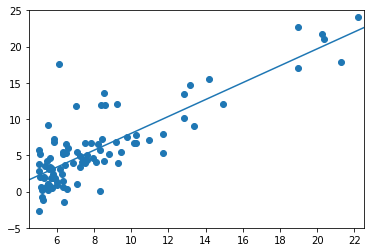

In [11]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [12]:
def cost(X, y, theta):
    
    return 1/(2*len(X))*np.dot(predict(X,theta)-y,predict(X,theta)-y)

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [13]:
cost(X,y,[0,0])

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [15]:
cost(X,y,[-1,2])

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [16]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = []
    for i in range(num_iters):
        h = predict(X, theta)
        theta[0] = theta[0] - alpha/m*np.sum(h - y)
        theta[1] = theta[1] - alpha/m*np.dot(h - y, X)
        J_history.append(cost(X,y,theta))
    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [17]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [18]:
# Lancez l'entraînement avec votre nouvelle fonction
theta, J_history = fit_with_cost(X,y,theta,0.01,1500)

In [19]:
theta

array([-3.63029144,  1.16636235])

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

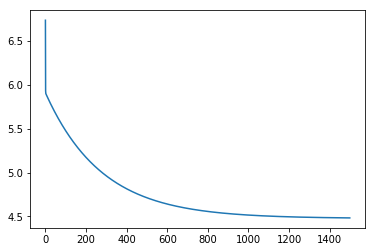

In [20]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)